In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

## Visualization

## iris data

<class 'numpy.ndarray'>


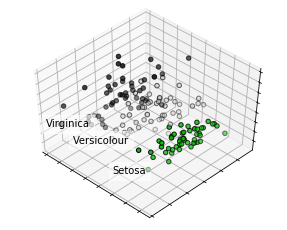

In [52]:
np.random.seed(5)

centers = [[1,1],[-1,-1],[1,-1]]
iris = datasets.load_iris()
x = iris.data
y = iris.target
fig = plt.figure(1, figsize=(4,3))
plt.clf

ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(x)
X = pca.transform(x)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(y, [1,2,0]).astype(np.float)
print(type(y))
ax.scatter(X[:,0],X[:,1],X[:,2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## boston

In [57]:
boston = datasets.load_boston()
x_boston = boston.data
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = pd.DataFrame(boston.target)

x_df = boston_df.drop("PRICE", axis=1)
y = boston_df.PRICE
df_columns = boston.feature_names

## Rescaling  Data

In [58]:
import pandas, scipy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

rescaledX = scaler.fit_transform(x)
np.set_printoptions(precision=3)

rescaled_b = scaler.fit_transform(x_boston)
rescaled_b

array([[0.000e+00, 1.800e-01, 6.782e-02, ..., 2.872e-01, 1.000e+00,
        8.968e-02],
       [2.359e-04, 0.000e+00, 2.423e-01, ..., 5.532e-01, 1.000e+00,
        2.045e-01],
       [2.357e-04, 0.000e+00, 2.423e-01, ..., 5.532e-01, 9.897e-01,
        6.347e-02],
       ...,
       [6.119e-04, 0.000e+00, 4.205e-01, ..., 8.936e-01, 1.000e+00,
        1.079e-01],
       [1.161e-03, 0.000e+00, 4.205e-01, ..., 8.936e-01, 9.913e-01,
        1.311e-01],
       [4.618e-04, 0.000e+00, 4.205e-01, ..., 8.936e-01, 1.000e+00,
        1.697e-01]])

## Standardizing Data

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledb = scaler.fit_transform(x_boston)
rescaledb

array([[-0.42 ,  0.285, -1.288, ..., -1.459,  0.441, -1.076],
       [-0.417, -0.488, -0.593, ..., -0.303,  0.441, -0.492],
       [-0.417, -0.488, -0.593, ..., -0.303,  0.396, -1.209],
       ...,
       [-0.413, -0.488,  0.116, ...,  1.176,  0.441, -0.983],
       [-0.408, -0.488,  0.116, ...,  1.176,  0.403, -0.865],
       [-0.415, -0.488,  0.116, ...,  1.176,  0.441, -0.669]])

## Normalizing Data

In [66]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)
normalized_b = scaler.fit_transform(x_boston)
normalized_b

array([[1.264e-05, 3.600e-02, 4.620e-03, ..., 3.060e-02, 7.937e-01,
        9.959e-03],
       [5.785e-05, 0.000e+00, 1.498e-02, ..., 3.771e-02, 8.408e-01,
        1.936e-02],
       [5.857e-05, 0.000e+00, 1.517e-02, ..., 3.820e-02, 8.431e-01,
        8.650e-03],
       ...,
       [1.238e-04, 0.000e+00, 2.430e-02, ..., 4.278e-02, 8.085e-01,
        1.149e-02],
       [2.246e-04, 0.000e+00, 2.445e-02, ..., 4.305e-02, 8.065e-01,
        1.328e-02],
       [9.692e-05, 0.000e+00, 2.439e-02, ..., 4.293e-02, 8.114e-01,
        1.611e-02]])

## Binarizing Data

In [76]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(x)
binaryX = binarizer.transform(x)

binarizer_boston = Binarizer(threshold=0.0).fit(x_boston)
binary_boston = binarizer.transform(x_boston)
binary_boston

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

## Mean Removal

In [78]:
from sklearn.preprocessing import scale

data_standardized = scale(x)
data_standardized.mean(axis=0), data_standardized.std(axis=0)

data_standardized_boston = scale(x_boston)
data_standardized_boston.mean(axis=0), data_standardized.std(axis=0)

(array([-8.787e-17, -6.343e-16, -2.683e-15,  4.702e-16,  2.490e-15,
        -1.145e-14, -1.408e-15,  9.211e-16,  5.441e-16, -8.869e-16,
        -9.206e-15,  8.163e-15, -3.370e-16]), array([1., 1., 1., 1.]))

## Describing the dataset

In [79]:
df_iris=pandas.read_csv('C:\\Users\\morio\\PycharmProjects\\Free\\venv\\Lib\\site-packages\\tensorflow\\contrib\\learn\\python\\learn\\datasets\\data\\iris.csv')
df_iris.describe()

boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Shape of the dataset

In [80]:
df_iris.shape
boston_df.shape

(506, 14)

## Extracting data from the dataset

In [81]:
df_iris.head(10)
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Performing operations around a variable

In [82]:
df_iris.groupby('4').size()
boston_df.groupby('PTRATIO').size()

PTRATIO
12.6      3
13.0     12
13.6      1
14.4      1
14.7     34
14.8      3
14.9      4
15.1      1
15.2     13
15.3      3
15.5      1
15.6      2
15.9      2
16.0      5
16.1      5
16.4      6
16.6     16
16.8      4
16.9      5
17.0      4
17.3      1
17.4     18
17.6      7
17.8     23
17.9     11
18.0      5
18.2      4
18.3      4
18.4     16
18.5      4
18.6     17
18.7      9
18.8      2
18.9      3
19.0      4
19.1     17
19.2     19
19.6      8
19.7      8
20.1      5
20.2    140
20.9     11
21.0     27
21.1      1
21.2     15
22.0      2
dtype: int64

## Histograms

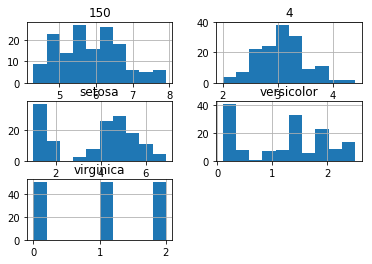

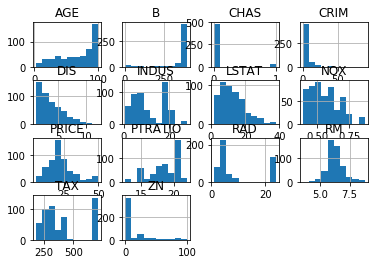

In [83]:
df_iris.hist()
boston_df.hist()
plt.show()

## Density Plots

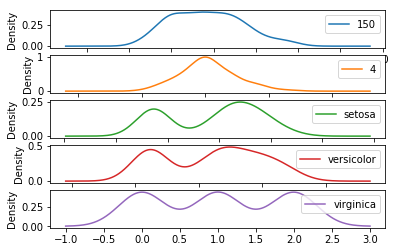

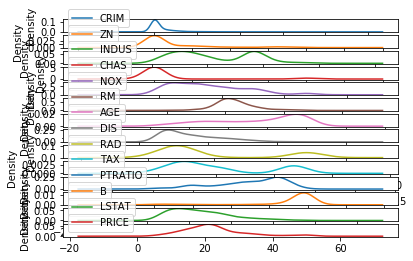

In [84]:
df_iris.plot(kind='density', subplots=True, sharex=False)
boston_df.plot(kind='density', subplots=True, sharex=False)
plt.show()

## Box and Whisker Plots

150              AxesSubplot(0.125,0.536818;0.227941x0.343182)
4             AxesSubplot(0.398529,0.536818;0.227941x0.343182)
setosa        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
versicolor          AxesSubplot(0.125,0.125;0.227941x0.343182)
virginica        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

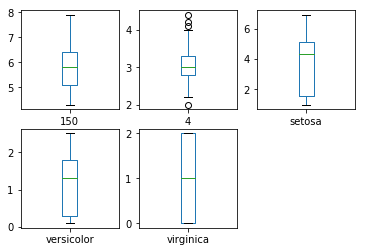

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_iris.plot(kind='box', ax=ax, subplots=True, layout=(2, 3), sharex=False, sharey=False)

CRIM          AxesSubplot(0.125,0.125;0.0466867x0.755)
ZN         AxesSubplot(0.181024,0.125;0.0466867x0.755)
INDUS      AxesSubplot(0.237048,0.125;0.0466867x0.755)
CHAS       AxesSubplot(0.293072,0.125;0.0466867x0.755)
NOX        AxesSubplot(0.349096,0.125;0.0466867x0.755)
RM          AxesSubplot(0.40512,0.125;0.0466867x0.755)
AGE        AxesSubplot(0.461145,0.125;0.0466867x0.755)
DIS        AxesSubplot(0.517169,0.125;0.0466867x0.755)
RAD        AxesSubplot(0.573193,0.125;0.0466867x0.755)
TAX        AxesSubplot(0.629217,0.125;0.0466867x0.755)
PTRATIO    AxesSubplot(0.685241,0.125;0.0466867x0.755)
B          AxesSubplot(0.741265,0.125;0.0466867x0.755)
LSTAT      AxesSubplot(0.797289,0.125;0.0466867x0.755)
PRICE      AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

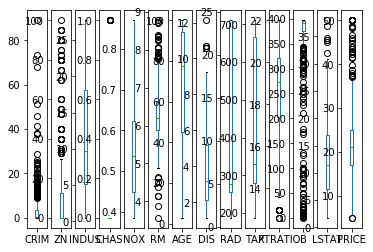

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
boston_df.plot(kind='box', ax=ax, subplots=True, sharex=False, sharey=False)

## Correlation Matrix Plot

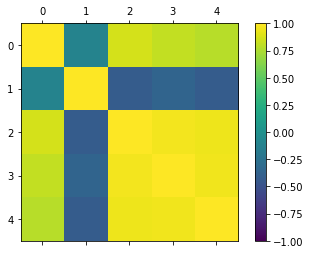

In [85]:
correlations_iris = df_iris.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(correlations_iris, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,5,1)
ax.set_yticks(ticks)
plt.show()

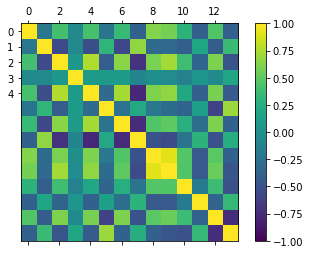

In [89]:
correlations_boston = boston_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_boston, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0,5,1)
ax.set_yticks(ticks)
plt.show()

## Scatterplot Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203B63CB390>,
      dtype=object)

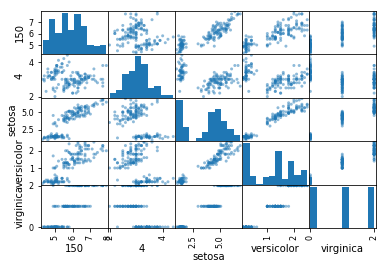

In [86]:
pandas.plotting.scatter_matrix(df_iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F37B8846D8>,
      dtype=object)

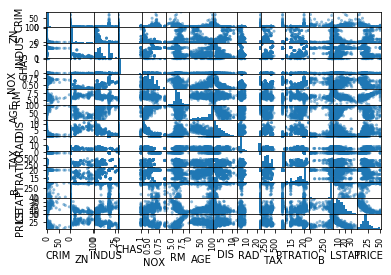

In [90]:
pandas.plotting.scatter_matrix(boston_df)